In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Ecommerce.csv')
df.head()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,1476,130,65,213.905831,31.600751,233,235
1,1535,543,46,639.223004,5.689175,228,170
2,1807,520,102,1157.402763,844.321606,247,409
3,1727,702,83,1195.903634,850.041757,148,200
4,1324,221,84,180.754616,64.283300,243,259


In [5]:
df.shape

(2500, 7)

In [6]:
df.drop('ID', axis=1, inplace=True)
df.head()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,130,65,213.905831,31.600751,233,235
1,543,46,639.223004,5.689175,228,170
2,520,102,1157.402763,844.321606,247,409
3,702,83,1195.903634,850.041757,148,200
4,221,84,180.754616,64.283300,243,259


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df)
X

array([[-1.49525046, -0.75853514, -1.05461141, -0.73280039,  0.32311781,
         0.33919174],
       [ 0.72069055, -1.24748762, -0.69029218, -0.78600183,  0.27267227,
        -0.31003449],
       [ 0.59728463,  0.19363547, -0.24642848,  0.93587151,  0.46436533,
         2.07712043],
       ...,
       [-0.18070918,  0.42524454, -1.2378394 , -0.7976828 , -1.18015931,
         2.52658475],
       [-0.73871854, -1.60776839,  1.49508613, -0.63726061, -0.90775339,
         0.13942982],
       [ 2.17473416,  0.73405663, -0.04325887,  1.38982053,  0.47445444,
        -0.51978451]])

In [9]:
from sklearn.decomposition import PCA

pca = PCA(2)
components = pca.fit_transform(X)

x = components[:, 0]
y = components[:, 1]

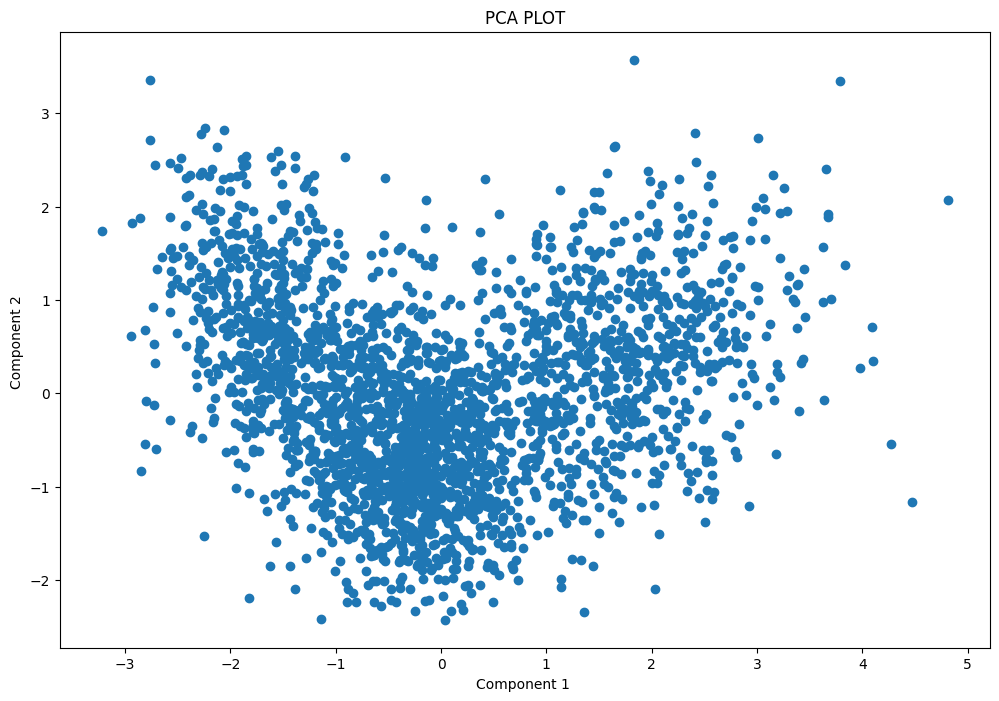

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(x, y)
plt.xlabel('Component 1 ')
plt.ylabel('Component 2 ')
plt.title('PCA PLOT')
plt.show()

In [11]:
from sklearn.cluster import DBSCAN

In [12]:
dbsc = DBSCAN(eps=1.0, min_samples=12)
dbsc.fit(X)

DBSCAN(eps=1.0, min_samples=12)

In [13]:
labels = dbsc.labels_
labels

array([ 0,  0, -1, ...,  0,  0,  0])

In [14]:
np.unique(labels)

array([-1,  0,  1])

In [15]:
from sklearn.metrics import davies_bouldin_score as dunn_index

In [16]:
print(f'Dunn index for DBSCAN : {dunn_index(X,labels)}')

Dunn index for DBSCAN : 2.97292858543806
